In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np


/anaconda3/envs/dlcv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
IMG_HELP_PATH = '/Users/shankar/dev/code/ds/studies/data_science/dlcv/sb/c07-first_image_classifier'
IMG_FILE_PATH = '../datasets/animals'

In [11]:
import os
import sys
sys.path.append(os.path.abspath(IMG_HELP_PATH))
imagePaths = list(paths.list_images(IMG_FILE_PATH))

In [5]:
from pyimagesearch.preprocessing import ImageToArrayPreprocessor
from pyimagesearch.preprocessing import SimplePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from pyimagesearch.nn.conv import ShallowNet


In [12]:
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float")/255.0

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [13]:
# Get test and train data
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [14]:
# Convert the labels from integers to verctors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [15]:
print("[INFO] compiling model...")
opt = SGD(lr=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [16]:
# Train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=100, verbose=1)

[INFO] training network...
Train on 2250 samples, validate on 750 samples
Epoch 1/100
2250/2250 [==============================] - 2s 934us/step - loss: 1.0198 - acc: 0.4698 - val_loss: 0.9861 - val_acc: 0.4840
Epoch 2/100
2250/2250 [==============================] - 2s 787us/step - loss: 0.9286 - acc: 0.5373 - val_loss: 1.0002 - val_acc: 0.4907
Epoch 3/100
2250/2250 [==============================] - 2s 804us/step - loss: 0.8883 - acc: 0.5511 - val_loss: 0.9673 - val_acc: 0.4960
Epoch 4/100
2250/2250 [==============================] - 2s 802us/step - loss: 0.8767 - acc: 0.5484 - val_loss: 0.9930 - val_acc: 0.4587
Epoch 5/100
2250/2250 [==============================] - 2s 784us/step - loss: 0.8494 - acc: 0.5707 - val_loss: 0.8655 - val_acc: 0.5600
Epoch 6/100
2250/2250 [==============================] - 2s 782us/step - loss: 0.8379 - acc: 0.5818 - val_loss: 0.8655 - val_acc: 0.5667
Epoch 7/100
2250/2250 [==============================] - 2s 782us/step - loss: 0.8150 - acc: 0.6040 - va

In [17]:
# Evaluating the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=["cat", "dog", "panda"]))

[INFO] evaluating network...
             precision    recall  f1-score   support

        cat       0.56      0.85      0.67       262
        dog       0.62      0.35      0.44       249
      panda       0.87      0.77      0.82       239

avg / total       0.68      0.66      0.64       750



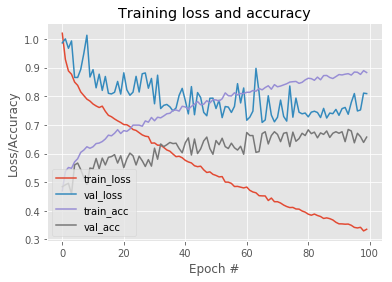

In [18]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()